In [1]:
import cv2
import matplotlib.pyplot as plt
import easyocr

def recognize_text_img(image):
    reader = easyocr.Reader(['en'], gpu=False)
    
    plt.figure(figsize=(10,10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    
    
    results = reader.readtext(image)
    
    for result in results:
        text = result[1]
        print(text)



0: 640x640 1 rider, 149.1ms
Speed: 16.4ms preprocess, 149.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x416 2 Without Helmets, 90.6ms
Speed: 2.0ms preprocess, 90.6ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

0: 384x416 1 License_Plate, 57.9ms
Speed: 2.0ms preprocess, 57.9ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)
Using CPU. Note: This module is much faster with a GPU.


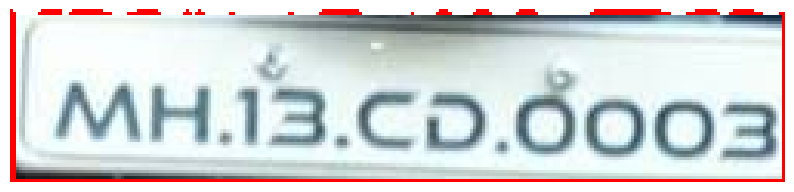

MHI3.CD.0003


In [4]:
import cv2
from ultralytics import YOLO
import random


model = YOLO("motorcyclist.pt") 
class_list = ["RIDER"]


model2 = YOLO("num_plate.pt") 
class_list2 = ["NUM_PLATE"]


model1 = YOLO("helmet_12k.pt") 
class_list1 = ["WITH","WITH-OUT"]


# Load the image file
frame = cv2.imread(r"hd_biker2.jpg")
# frame = cv2.imread(r"C:\Users\anoop\Desktop\PROJECT\BIKERS\hd_biker2.jpg")


# Detect objects in the image
detect_params = model.predict(source=[frame], conf=0.1, save=False)

# Loop over the detected objects and draw bounding boxes
for box in detect_params[0].boxes:
    clsID = box.cls.numpy()[0]
    conf = box.conf.numpy()[0]
    bb = box.xyxy.numpy()[0]

    x1 = int(bb[0])
    x2 = int(bb[2])
    y1 = int(bb[1])
    y2 = int(bb[3])

    text = class_list[int(clsID)] + " " + str(round(conf, 3)) + "%"

    cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 255, 0), 3)

    font = cv2.FONT_HERSHEY_COMPLEX

    cv2.putText(frame, text, (x1, y1), font, 1, (255, 255, 255), 2)

    motorcycle_region = frame[y1:y2, x1:x2]
    
    
    
    if clsID == 0:
        # Run model1 on the detected rider
        detect_params1 = model1.predict(source=[motorcycle_region], conf=0.1, save=False)
            
        for box1 in detect_params1[0].boxes:
            clsID1 = box1.cls.numpy()[0]
            conf1 = box1.conf.numpy()[0]
            bb1 = box1.xyxy.numpy()[0]
                
            x1_1 = int(bb1[0])
            x2_1 = int(bb1[2])
            y1_1 = int(bb1[1])
            y2_1 = int(bb1[3])
                
            text1 = class_list1[int(clsID1)] + " " + str(round(conf1, 3)) + "%"
                
            cv2.rectangle(motorcycle_region, (x1_1, y1_1), (x2_1, y2_1), (0, 255, 0), 2)
            cv2.putText(motorcycle_region, text1, (x1_1, y1_1), font, 1, (255, 255, 255), 2)
                
                
                
            # Run model2 on the detected rider
        detect_params2 = model2.predict(source=[motorcycle_region], conf=0.1, save=False)
    
        for box2 in detect_params2[0].boxes:
            clsID2 = box2.cls.numpy()[0]
            conf2 = box2.conf.numpy()[0]
            bb2 = box2.xyxy.numpy()[0]
                
            x1_2 = int(bb2[0])
               
            x2_2 = int(bb2[2])
            y1_2 = int(bb2[1])
            y2_2 = int(bb2[3])
            
            text2 = class_list2[int(clsID2)] + " " + str(round(conf2, 3)) + "%"

            cv2.rectangle(motorcycle_region, (x1_2, y1_2), (x2_2, y2_2), (0, 0, 255), 2)
            cv2.putText(motorcycle_region, text2, (x1_2, y1_2), font, 1, (255, 255, 255), 2)

            if conf2>0.4 and clsID1==1 :
                number_plate = motorcycle_region[y1_2:y2_2,x1_2:x2_2]
                recognize_text_img(number_plate)
    
                
cv2.imshow('frame', frame)
    
    
    

# cv2.imshow('frame', frame)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [3]:
pip install ultralytics


     ---------------------------------------- 0.0/589.4 kB ? eta -:--:--
     -- ------------------------------------- 41.0/589.4 kB ? eta -:--:--
     ----------------- -------------------- 276.5/589.4 kB 3.4 MB/s eta 0:00:01
     ----------------------- -------------- 368.6/589.4 kB 2.3 MB/s eta 0:00:01
     ------------------------------- ------ 491.5/589.4 kB 2.4 MB/s eta 0:00:01
     --------------------------------- ---- 512.0/589.4 kB 2.0 MB/s eta 0:00:01
     -------------------------------------  583.7/589.4 kB 1.9 MB/s eta 0:00:01
     -------------------------------------- 589.4/589.4 kB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 0.0/206.5 kB ? eta -:--:--
     ----------------- --------------------- 92.2/206.5 kB 2.6 MB/s eta 0:00:01
     -------------------- ----------------- 112.6/206.5 kB 2.2 MB/s eta 0:00:01
     ---------------------------- --------- 153.6/206.5 kB 1.1 MB/s eta 0:00:01
     ----------------------------------- -- 194.6/206.5 kB 1

In [4]:
!pip install ultralytics